In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [3]:
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Q2. Drop animal_name 


In [4]:
df = data.drop(labels = 'animal_name',axis = 1)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Q3 Check distribution of target variable

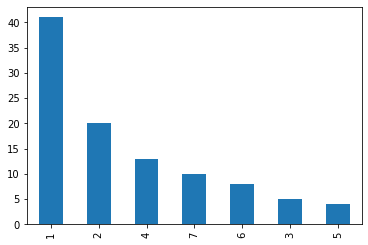

In [5]:
#sns.countplot(df['class_type'].value_counts())
df['class_type'].value_counts().plot(kind = 'Bar')

### Q4. Check for missing values

In [8]:
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

### Q5. Import class file and understand the data

In [9]:
demo = pd.read_csv('class.csv')
demo

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


### Q6. Standardize the data 

In [16]:
from scipy.stats import zscore
df1 = df.drop(labels = 'class_type',axis = 1)
df1 = df1.apply(zscore)
df1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


### Q7. Find out the linkage matrix

In [18]:
import scipy.cluster.hierarchy as shc
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
demo = (shc.linkage(df1.values, method='ward'))
demo

array([[  0.        ,   3.        ,   0.        ,   2.        ],
       [  1.        ,   5.        ,   0.        ,   2.        ],
       [  2.        ,   8.        ,   0.        ,   2.        ],
       [ 17.        , 102.        ,   0.        ,   3.        ],
       [ 22.        , 104.        ,   0.        ,   4.        ],
       [ 28.        , 105.        ,   0.        ,   5.        ],
       [ 55.        , 106.        ,   0.        ,   6.        ],
       [  4.        ,  10.        ,   0.        ,   2.        ],
       [  6.        ,  31.        ,   0.        ,   2.        ],
       [ 34.        ,  73.        ,   0.        ,   2.        ],
       [ 82.        , 110.        ,   0.        ,   3.        ],
       [ 12.        , 103.        ,   0.        ,   3.        ],
       [ 38.        , 112.        ,   0.        ,   4.        ],
       [ 61.        , 113.        ,   0.        ,   5.        ],
       [ 18.        ,  60.        ,   0.        ,   2.        ],
       [ 92.        , 115

### Q8. Plot the dendrogram.

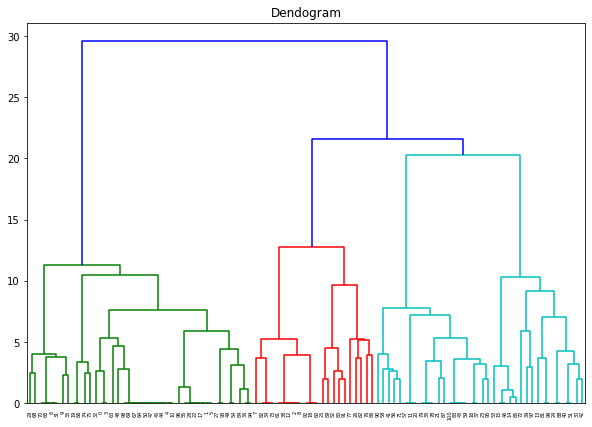

In [19]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df1.values, method='ward'))

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

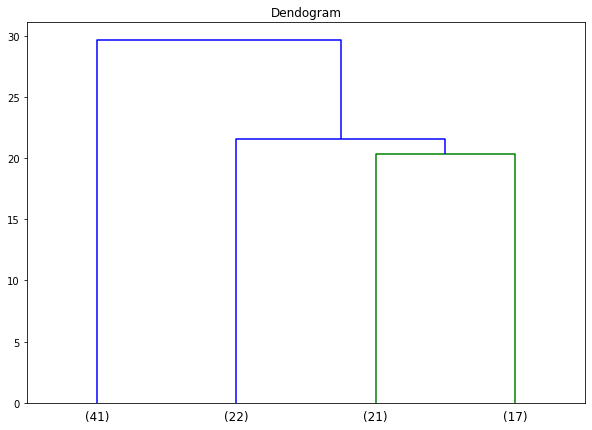

In [20]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df1.values, method='ward'),truncate_mode='lastp',p = 4)

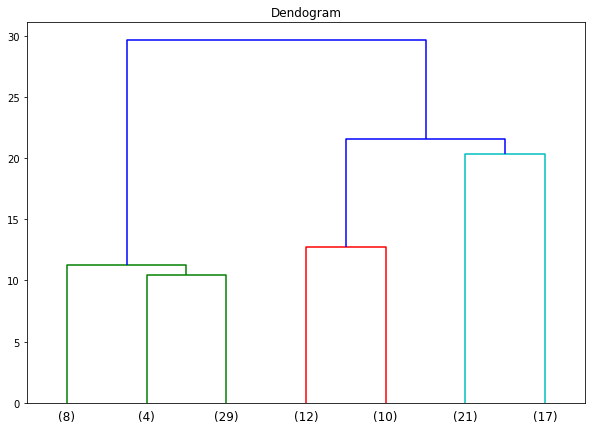

In [21]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df1.values, method='ward'),truncate_mode='lastp',p = 7)

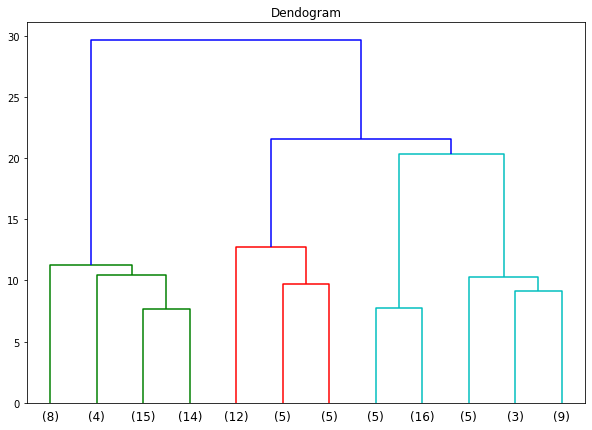

In [23]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df1.values, method='ward'),truncate_mode='lastp',p = 12)

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

1616.0
1177.500566494201
927.2668879904176
721.2567436158248
647.2975038779302
583.6045229819006
531.7699847536827
483.5805529512911
453.0063298780624
411.5914160771121


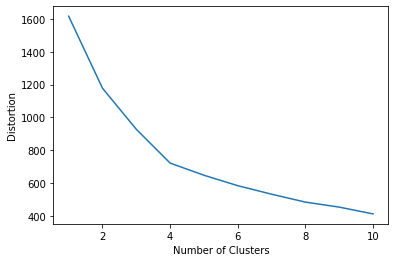

In [24]:
#Using K-mean
distortion = {}
from sklearn.cluster import KMeans
for k in range(1,11):
    kMeans = KMeans(n_clusters = k)
    kMeans.fit(df1)
    distortion[k] = kMeans.inertia_
    print(distortion[k])
sns.lineplot(x = list(distortion.keys()), y = list(distortion.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [25]:
# K = 4
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
df2 = km.cluster_centers_
labels_df = pd.DataFrame(columns=df1.columns, data=df2)
labels_df = pd.DataFrame(columns=['class_label'], data=km.labels_)
labels_df
data['class_label']=labels_df
km.labels_

array([4, 4, 2, 4, 4, 4, 1, 2, 2, 1, 4, 0, 2, 5, 5, 5, 0, 4, 2, 2, 0, 0,
       4, 0, 5, 3, 3, 4, 4, 1, 5, 1, 4, 0, 2, 1, 4, 0, 2, 5, 5, 0, 5, 0,
       4, 4, 5, 4, 4, 4, 4, 5, 3, 5, 4, 4, 0, 0, 0, 0, 2, 2, 3, 4, 4, 1,
       2, 4, 1, 4, 1, 0, 5, 2, 4, 4, 2, 5, 0, 0, 3, 5, 2, 0, 4, 5, 2, 0,
       5, 3, 3, 3, 2, 4, 4, 0, 4, 5, 4, 5, 0])

In [31]:
#Using dindogram
# K = 6
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
df2 = km.cluster_centers_
labels_df = pd.DataFrame(columns=df1.columns, data=df2)
labels_df = pd.DataFrame(columns=['class_label'], data=km.labels_)
labels_df
data['class_label']=labels_df
km.labels_

array([4, 4, 2, 4, 4, 4, 0, 2, 2, 0, 4, 1, 2, 3, 3, 3, 1, 4, 2, 2, 1, 1,
       4, 1, 3, 5, 5, 4, 4, 0, 3, 0, 4, 1, 2, 0, 4, 1, 2, 3, 3, 1, 3, 1,
       4, 4, 3, 4, 4, 4, 4, 3, 5, 3, 4, 4, 1, 1, 1, 1, 2, 2, 5, 4, 4, 0,
       2, 4, 0, 4, 0, 1, 5, 2, 4, 4, 5, 3, 1, 1, 5, 3, 2, 1, 4, 3, 2, 1,
       3, 5, 1, 5, 2, 4, 4, 1, 4, 3, 4, 3, 1])